# Getting started: an interactive tutorial for using iDEA

## Guide to using jupyter notebooks

Jupyter notebooks allow code to be edited and run within the notebook using an iPython shell, giving ouputs and error messages. This allows the user to play around with the code as much as they'd like. Much like the iPython shell, one closed and reopened, all the relevent code boxes must be executed once again (everything will once again be default). Left of the code box shows the order of execution. If the code is currently executing, it will display an asterisk. **Press 'Shift + Enter' to execute the code**.

When exiting the Jupyter notebook, make sure to save the click 'File' then 'Close and Halt' to stop the notebook running. Note that, like a Python shell, all changes made to source code and data created will be lost (apart from whatever the last output was when the code block was ran).

## The iDEA code

The iDEA code can solve the time-independent as well as the time-dependent Schrödinger equation for 2-3 electrons in one-dimensional real space. It can then be compared with known methods for solving many-body problems, such as various flavours of density functional theory and many-body perturbation theory.

Compared to lattice models, such as the Anderson impurity model, this approach allows to treat exchange and correlation throughout the system and provides additional flexibility in bridging the gap between model systems and ab initio descriptions.

For a list of features, see the [iDEA homepage](https://www.cmt.york.ac.uk/group_info/idea_html/index.html).

## 1. Running iDEA
In the following, we assume that you have installed idea following the [installation instructions on the web site](https://www.cmt.york.ac.uk/group_info/idea_html/tutorial/get.html).

### Setting up

All iDEA files are found in `iDEAL` so this needs to be made the current directory.

* `parameters.py` contains all the parameters for iDEA and editing the varaibles within this will change what system iDEA will solve for
* `iDEA/input.py` in the iDEA folder which will allow 'parameters.py' to be used. Hence:

In [2]:
from iDEA.input import Input
pm = Input.from_python_file('parameters.py')

### Parameters

The parameters file decides exactly what simulation is run. The main parameters are the `run` and `system` parameters. Printing them to the screen, it can be seen what their default setting is. Do not worry about what they all mean for the moment as they will be described, in detail, later on.

In [3]:
print(pm.run)
print(pm.sys)

name = 'run_name'
time_dependence = False
verbosity = 'default'
save = True
module = 'iDEA'
NON = True
LDA = False
MLP = False
HF = False
EXT = True
MBPT = False
HYB = False
LAN = False
MET = False

NE = 2
grid = 201
stencil = 3
xmax = 10.0
tmax = 1.0
imax = 1001
acon = 1.0
interaction_strength = 1.0
im = 0
v_ext = <function v_ext at 0x7f0518dea7b8>
v_pert = <function v_pert at 0x7f0518dea9d8>
v_pert_im = <function v_pert_im at 0x7f0518deaa60>



As can be seen above, the run parameters decide what method is used. It should be noted that multiple methods can be set to true and the iDEA code will do both in a single run.
The system parameters can alter things like the number of electrons, grid size and maximum time. The potentials cannot be shown, as they are functions. The parameter file needs to be edited directly to change the function.

It is EXTREMELY important to set a run name before you start the simulation. This creates a subdirectory in which all the results are contained. If you do not set a run name, it will default to 'run_name' and before long, it will be hard to keep track of the results and will overwrite previous results of the same time. This is obviously not ideal.

The current setting is solving the time-independent Schrodinger equation for two electrons exactly, finding the ground-state many-electron wavefunction (by propagation in imaginary time) and using DFT with the non-interaction approximation.

The individual parameter values can be overwritten in iPython, and hence this notebook, like so:

In [4]:
pm.run.LDA = False
pm.sys.NE = 2
# Create a new subdirectory to contain the results onwards from this. Note
# once the kernal is restarted, all this setup needs to be repeated.
pm.run.name = 'get_started_basics'

The iDEA code can now be executed. The object 'results' recieves the code output so that the results can be referenced in matplotlib for plotting.

Note that, depending on the complexity of the simulation and the number of jobs set to complete, the results may take some time to generate (note the asterisk). For the default setup, it takes approximately 10 seconds to complete but do note that something like a time-dependent simulation propagating for a reasonable time may take hours.

Now to execute the code:

In [5]:
pm.check()  # perform a few sanity checks
results = pm.execute()

                                                              
                *    ****     *****       *                   
                     *   *    *          * *                  
                *    *    *   *         *   *                 
                *    *     *  *****    *     *                
                *    *    *   *       *********               
                *    *   *    *      *         *              
                *    ****     ***** *           *             
                                                              
  +----------------------------------------------------------+
  |          Interacting Dynamic Electrons Approach          |
  |              to Many-Body Quantum Mechanics              |
  |                                                          |
  |                      Release 2.3.0                       |
  |                                                          |
  |                     git commit hash                

All the data from the simulation will be placed in the outputs directory, specifically: **outputs/run_name/raw** where run_name is the default subdirectory created if the used hasn't changed the

##  2. Plotting the results

Matplotlib integrates well with python so this is recommended. As usual, this needs to be imported:

In [6]:
import matplotlib.pyplot as plt

The electron density for the exact solution and DFT with the non-interaction will be plotted. The results are organised by **result.resultType.gs_resultType_info** where in this case, **resultType** is 'ext' (exact) and 'non' (non-interaction) and **info** is 'den' (electron density). *Colour-reference*

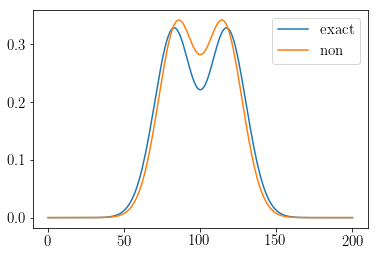

In [7]:
plt.plot(results.ext.gs_ext_den, label='exact')
plt.plot(results.non.gs_non_den, label='non')
plt.legend()

In [8]:
plt.show()

Although this is a perfectly acceptable way of plotting results, there is another way, which is in keeping more with the object-oriented approach that has, thus far and in the future, been taken. The results need to be imported as such:

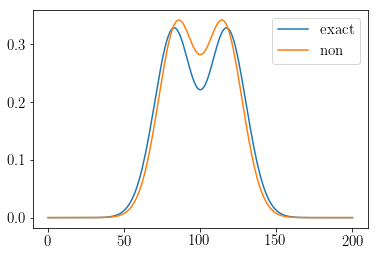

In [9]:
from iDEA.results import Results as rs
# Make sure the run name is correct first
pm.run.name = 'get_started_basics'
# The data is imported as follows:
example_plot_ext = rs.read('gs_ext_den',pm)
example_plot_non = rs.read('gs_non_den',pm)

# Note that a variable needs to be created containing the data. The string,
# which is the name of the data file does not contain the file extension.
# Note that pm is also an argument.

# Next, plotted as follows:
plt.plot(example_plot_ext,label='exact')
plt.plot(example_plot_non,label='non')
plt.legend()
plt.show()

## 3. Changing the parameters

Be prepared; there are many parameters that, at first, might seem confusing (most of the specialist parameters are explained in section 6). However, there is no need to worry, since iDEA contains a lot of specialised functionalities that can be ignored. To emphasise this, the core functionalities will be in bold and the more specialised, not. For the sake of completeness, however, there will be a brief description of all parameters. Again not that it will not be necessary to understand these to be able to use iDEA effectively for most purposes.

As a reminder, to find the parameters, when coding type the relevent parameter (run, sys etc.) followed by a full stop, then press 'Tab' to autocomplete.

As mentioned before, the run parameters decide what is ran, where multiple things can be run at once. These take either the value True or False:
* **run.time_dependence** - Time-dependence
* **run.NON**             - The Non-interaction approximation 
* **Density Functional Theory**
    * **run.LDA**         - Local Density Approximation
* **run.HF**              - Hartree-Fock approximation

Each of these have further parameters which can be adjusted, which will be discussed later.

There are also system parameters, which change more general aspects of the simulation:
* **sys.NE**                   - Number of electrons *(2/3)*
* **sys.grid**                 - Number of grid points (odd to include the zero)
* sys.stencil              - Descretisation of 2nd derivative (3,5 or 7) {higher means more accuracy, more memory usage}
* **sys.xmax**                 - Size of the system
* **sys.tmax**                 - Total real time
* **sys.imax**                 - Number of real-time iterations
* sys.acon                 - Smoothing of Coulomb interaction
* sys.interaction_strength - Scales strength of Coulomb interaction
* sys.im                   - Using imaginary potentials (0=no/1=yes) 

The number of grid points determines the accuracy of how the discrete system simulations the true continuous system. 201 is a good default.

Imaginary potentials are introduced at the boundary. They are used to create more accurate results for systems where electrons are colliding off one another.

## 4. Potential functions

Note that we are working in Hatree atomic units ($\hbar = e = m = 4\pi\epsilon_0 = 1$), which means the unit of length is the Bohr radius (53 pm) and the unit of energy is the Hartree (27.2 eV).

The potential functions, such as the external, T-D pertubation and imaginary pertubation potentials can be definined in a function, and set to the parameters as follows:

In [10]:
def v_ext(x):
    'Initial external potential'
    return 0.5*(0.25**2)*(x**2)
pm.sys.v_ext = v_ext

Any reasonable potential can be defined this way.

## 5. Time Dependence

The time-dependent solutions can be found for exact and non-interacting. Let us now set up the parameters in mind for animating the results; extending the imaginary time propagation, number of grid points and total time. Bear in mind that, so the accuracy is not affected, if the imaginary time is increased, the number of grid points need to be scaled with it.

In [11]:
pm.run.time_dependence = True
pm.sys.grid= 301
pm.sys.imax = 15001
pm.sys.tmax = 15
pm.check()
#excecution commented out as T-D takes hours. Uncomment if you want to generate new results
#results=pm.execute()

### Animating the results

The time-dependent simulation will produce results, such as the electron density for each timestep. Therefore, the results may be animated so that the results can be interpreted in a meaningful way.

This can again be done through matplotlib.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from iDEA.input import Input

Since the time-dependent run takes a long time, it is useful to read the saved results from the output file so that the iDEA code does not have to be run every time we want to create an animation.

In [16]:
from iDEA.results import Results as rs
file_name = 'td_ext_den'  #Change this to the ".db" file name you want to see, not including the .db part
array = rs.read(file_name, pm)
print(np.shape(array))

(15001, 301)


Here, the first index corresponds to the time grid and the second to the spatial grid.

The background now needs to be created for the animation. The x-axis corresponds to the grid and the y axis the density, in this case.

In [17]:
fig, ax = plt.subplots()
ax.set_xlim((0, pm.sys.grid))
ax.set_ylim((0, 0.6))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.arange(0,pm.sys.grid)
    y = array[10*i,x]            # 10*i so that every 10th frame is animated
    line.set_data(x, y)
    return (line,)

rc('animation', html='html5')

animation.FuncAnimation(fig, animate, init_func=init,save_count =int(pm.sys.imax*0.1),

                               interval=10, blit=True)

### Freestyle

Now that all of the basics have been covered, use the cell below to change the parameters to test your understanding.

In [ ]:
# Use this cell to test understanding of what was covered so far

Once you are comfortable with all that has been discussed thus far, the next part of the tutorial will give a detailed description of all the parameters that can be changed. Each approximation/calculation has a further set of parameters which can be modified. There will be exercises to complete to test understanding, with hints at the bottom of the page if you encounter difficulty.

## 6. Further Parameters

### Exact Many-body Calculation

The exact many-body calculation is done by propagating the wavefunction in imaginary time, which eventually converges on the ground-state energy. The exact (ext) parameters are as follows:

* **ext.itol**           - Tolerance of imaginary time propagation                  (~ 1e-12)
* **ext.itol_solver**    - Tolerance of linear solver in imaginary time propagation (~ 1e-14)
* **ext.rtol_solver**    - Tolerance of linear solver in real time propagation      (~ 1e-12)
* **ext.itmax**          - Total imaginary time
* **ext.iimax**          - Imaginary time iterations
* **ext.ideltat**        - Imaginary time step (DERIVED)
* **ext.RE**             - Reverse engineer many-body density
* **ext.OPT**            - Calculate the external potential for the exact density
* **ext.excited_states** - Number of excited states to calculate (0 for only ground-state)
* **ext.elf_gs**         - Calculate ELF for the ground-state of the system
* **ext.elf_es**         - Calculate ELF for the excited-states of the system
* **ext.elf_td**         - Calculate ELF for the time-dependent part of the system
* **ext.psi_gs**         - Save the reduced ground-state wavefunction to file
* **ext.psi_es**         - Save the reduced excited-state wavefunctions to file
* **ext.initial_psi**    - initial wavefunction: qho, non, hf, lda1/2/3/heg, ext or wavefunction from previous run (e.g run_name)

Tolerance describes the difference between, say for example, densities between iterations before a successful convergence has occured.

ELF is the Electron Localisation Function which describes how localised the electrons are. This can be calculated for the ground-state, excited states and time-dependent system.

#### Exercise 1

Perfom exact many-body calculations for the first excited state and calculate the relevent ELF.

In [ ]:
pm.run.LDA = True
pm.sys.NE = 3
pm.run.verbosity = 'default'
pm.lda.NE = 'heg'
print(pm.run)
results = pm.execute()

name = 'run_name'
time_dependence = True
verbosity = 'default'
save = True
module = 'iDEA'
NON = True
LDA = True
MLP = False
HF = False
EXT = True
MBPT = False
LAN = False

                                                              
                *    ****     *****       *                   
                     *   *    *          * *                  
                *    *    *   *         *   *                 
                *    *     *  *****    *     *                
                *    *    *   *       *********               
                *    *   *    *      *         *              
                *    ****     ***** *           *             
                                                              
  +----------------------------------------------------------+
  |          Interacting Dynamic Electrons Approach          |
  |              to Many-Body Quantum Mechanics              |
  |                                                          |
  |     

### Non-interaction approximation

This is the simplest form of DFT, which acts as a baseline comparison to see whether an approximation, like the LDA, gives a good result compared to the non interacting result. The parameters are as follows:

* **non.rtol_solver** - Tolerance of linear solver in real time propagation (~e-13)
* **non.save_eig**    - Save eigenfunctions and eigenvalues of Hamiltonian
* **non.RE**          - Reverse-engineer non-interacting density
* **non.OPT**         - Calculate the external potential for the non-interacting density


### Local Density Approximation

This is the most common approximation used in DFT. The parameters are as follows:

* **lda.NE**                   - number of electrons used for LDA construction (1, 2, 3, 'heg')
* **lda.scf_type**            - scf type (linear, pulay, cg)
* **lda.mix**                  - mixing parameter for linear and Pulay mixing (between 0 and 1)
* **lda.pulay_order**          - history length for Pulay mixing (max: lda.max_iter)
* **lda.pulay_preconditioner** - preconditioner for Pulay mixing (None, kerker, rpa)
* **lda.kerker_length**        - length over which density flunctuations are screened (Kerker)
* **lda.tol**                  - convergence tolerance in the density
* **lda.etol**                 - convergence tolerance in the energy
* **lda.max_iter**             - maximum number of self-consistency iterations
* **lda.save_eig**             - save eigenfunctions and eigenvalues of Hamiltonian
* **lda.OPT**                  - calculate the external potential for the LDA density

For the number of electrons, 'heg' is an acronym for 'homogeneous electron gas'. There are also the types of self-consistency available: 'linear', 'pulay' and 'cg'. 'Linear' is the least complicated and used in most situations. Density fluctuations can occur, which prevents LDA from reaching self-consistency. These different methods and mixing of methods will help reach self-consistency.

#### Exercise 2

Perform DFT calculations for 2 electrons with the LDA approximations using 'heg' and compare with the non-interaction approximation and exact calculation by plotting the electron densities.

### Hartree-Fock calculation

The Hartree-Fock method is an alternative to DFT and is essentially a simplified version of many-body perturbation theory. The parameters are as follows:

* **hf.fock**     - include Fock term ( 0 = Hartree approximation, 1 = Hartree-Fock approximation)
* **hf.con**      - tolerance
* **hf.nu**       - mixing term
* **hf.save_eig** - save eigenfunctions and eigenvalues of the Hamiltonian
* **hf.RE**       - reverse engineering HF density
* **hf.OPT**      - calculate the external potential from the HF density


#### Exercise 3

Compare the electron densities for a two electron system with the exact and non-interacting.

### Reverse Engineering

The Reverse Engineering algorithm (for both time-independent and time-dependent systems) take the exact electron density and 'reverse engineers' the exact Kohn-Sham potential for the system. The parameters are as follows:

* **re.save_eig**           - save Kohn-Sham eigenfunctions and eigen values of reverse-engineered potential
* **re.stencil**            - discretisation of 1st derivative (5 or 7)
* **re.mu**                 - 1st convergence parameter in the ground-state reverse-engineering algorithm
* **re.p**                  - 2nd convergence parameter in the GS RE algorithm
* **re.nu**                 - convergence parameter in the time-dependent RE algorithm
* **re.rtol_solver**        - tolerance of the linear solver in real-time propagation (~1e-12)
* **re.density_tolerance**  - tolerance of the error in the time_dependent density
* **re.cdensity_tolerance** - tolerance of the error in the current density
* **re.max_iterations**     - maximum number of iterations per time step to find the Kohn-Sham potential
* **re.damping**            - damping factor used when filtering out noise in the Kohn-Sham vector potential (0: none)

#### Exercise

Reverse engineer the Kohn-Sham potential from the exact density from one of the previous exercises.